# API call to data from CMC

In [2]:
  #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '79de8351-de49-49c9-8b7f-9e854f62bfb3',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2021-03-04T14:40:50.249Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 4234}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9800, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channels', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio'], 'max_supply': 21000000, 'circulating_supply': 18644575, 'total_supply': 18644575, 'platform': None, 'cmc_rank': 1, 'last_updated': '2021-03-04T14:39:02.000Z', 'quote': {'USD': {'price': 50343.15464138324, 'volume_24h': 52306258023.50799, 'percent_change_1h': 2.03499099, 'percent_change_24h': -2.51412245, 'percent_change_7d': -2.08875392, 'percent_change_30d': 44.29832342, 'percent_change_60d': 48.68954927, 'percent_change_90d': 165.3283937, 'market_cap': 938626722447.8679, 'last_updated': '2021-03-04T14:39:02.000Z'}

In [3]:
import pandas as pd

#normalize the data into dataframe format
df = pd.json_normalize(data["data"])
cols_to_keep = ['name','symbol','cmc_rank','quote.USD.price','quote.USD.percent_change_24h','quote.USD.market_cap',]
df_final = df[cols_to_keep]
#rename columns
df_final.columns = ['name','symbol','cmc_rank','USD_price','USD_percent_change_24h','USD_market_cap',]
#print the table
df_final

,name,symbol,cmc_rank,USD_price,USD_percent_change_24h,USD_market_cap
0,Bitcoin,BTC,1,50343.154641,-2.514122,9.386267e+11
1,Ethereum,ETH,2,1599.371307,-0.891701,1.837866e+11
2,Cardano,ADA,3,1.173694,-6.010802,3.749755e+10
3,Binance Coin,BNB,4,241.504837,-2.555710,3.732041e+10
4,Tether,USDT,5,1.000738,0.028081,3.629065e+10
5,Polkadot,DOT,6,36.558747,-2.459625,3.345025e+10
6,XRP,XRP,7,0.462047,2.047167,2.097880e+10
7,Litecoin,LTC,8,188.292024,-0.373577,1.253892e+10
8,Chainlink,LINK,9,29.650683,-3.167875,1.215706e+10
9,Bitcoin Cash,BCH,10,523.112370,-2.947001,9.766799e+09


# Squarify

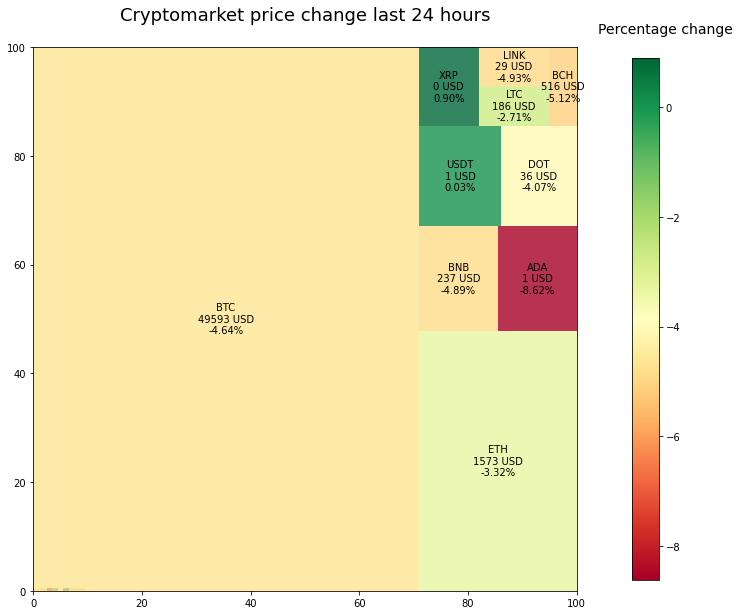

In [6]:
import matplotlib
import matplotlib.pyplot as plt
#!pip install squarify
import squarify 

#load data
sizes=df_final["USD_market_cap"]
label=df_final["name"]

# color scale on the price development 
# min and max values
cmap = matplotlib.cm.RdYlGn #RedYellowGreen
mini=min(df_final["USD_percent_change_24h"])
maxi=max(df_final["USD_percent_change_24h"])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df_final["USD_percent_change_24h"]]

# labels in treemap squares
labels = ["%s\n%d USD\n%0.2f%%" % (label) for label in zip(df_final.symbol, df_final["USD_price"], df_final["USD_percent_change_24h"])]

# make plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, aspect="auto")
ax = squarify.plot(df_final["USD_market_cap"], color=colors, label=labels,  alpha=.8)
ax.set_title("Cryptomarket price change last 24 hours\n", fontsize=18)

# plot title and color bar
img = plt.imshow([df_final["USD_percent_change_24h"]], cmap=cmap)
img.set_visible(True)
fig.colorbar(img, orientation="vertical", shrink=.96)
fig.text(.76, .9, "Percentage change", fontsize=14)

# if you want to export the figure
#plt.savefig("cmc_treemaps.png")
plt.show()

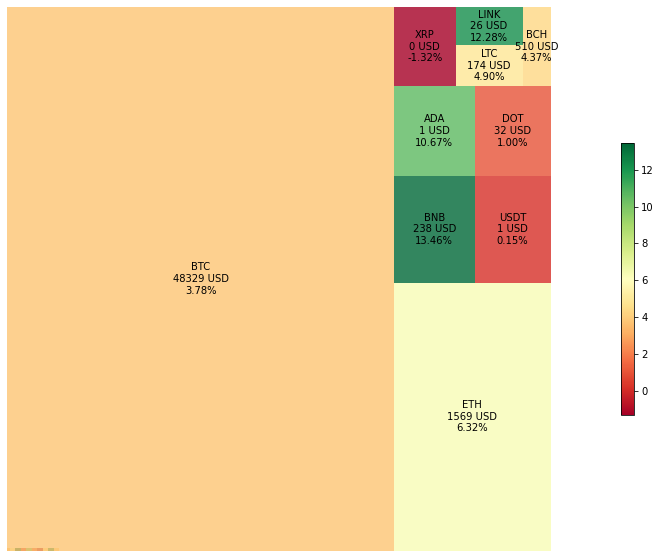

In [ ]:
fig = plt.figure(figsize=(25, 10))

cmap = matplotlib.cm.RdYlGn
mini=min(df_final["USD_percent_change_24h"])
maxi=max(df_final["USD_percent_change_24h"])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df_final["USD_percent_change_24h"]]

#colors = (df_final["quote.USD.percent_change_24h"] > 0).apply(lambda x: 'g' if x else 'r')

# labels in treemap squares
labels = ["%s\n%d USD\n%0.2f%%" % (label) for label in zip(df_final.symbol, df_final["USD_price"], df_final["USD_percent_change_24h"])]

# color bar
# create dummy invisible image with a color map
img = plt.imshow([df_final["USD_percent_change_24h"]], cmap=cmap)
img.set_visible(True)
fig.colorbar(img, orientation="vertical", shrink=.5 )

squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors )
#plt.colorbar(norm)
plt.axis('off')
plt.show()

#Plotly

In [21]:
#!pip install --upgrade plotly
import plotly.graph_objects as go
import plotly.express as px

fig = px.treemap(df_final, 
                 path=['name'], 
                 values='USD_market_cap',
                 color_continuous_scale='RdYlGn',
                 color='USD_percent_change_24h',            
                 )
fig.update_layout(title_text='Cryptomarket price change last 24 hours', title_x=0.5)
fig.show()

In [20]:
#BONUS
#Optional - to push your GC plot to Plotly Studio automatically
#!pip install chart_studio
import chart_studio.plotly as py
username = 'jackty92' # your username
api_key = 'pKb6RP6fraGOJmbjerBc' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'cmc_treemap', auto_open=True)

'https://plotly.com/~jackty92/11/'